In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/sksin/OneDrive/Desktop/IC272/Assignment-1/landslide_data_miss.csv")
df

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,NaN
3,11-07-2018,t10,NaN,87.68657,1036.857463,963.00,8.8358,4000.0,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.2385
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,NaN,58.69630,1026.797407,73577.25,5521.1231,47460.0,54.4222
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460.0,54.5674
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460.0,54.8794
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460.0,55.0286


In [3]:
def linear_interpolation(l):
    #print(l) 
    #print(l.isna().sum())
    #print(l[2])

    if(pd.isna(l[0])):
        l[0]=np.mean(l)
    
    index=0

    #while((l.isna().sum())!=0):
    for i in range (len(l)):
        li=0
        ni=0
        # missing value found at index=index and this value=linear interpolation wala y
        if(pd.isna(l[index])):#as soon as nan value is found at index=index
            li=index-1        # we fix the li(last index)
            while(pd.isna(l[index])):#now we are searching for the next index which is not nan
                ni=index+1
                index=index+1
        
            index=li+1

            l[index]=l[li] + ((index-li)*(l[ni]-l[li]))/(ni-li)#nan at index has been changed
            
        index=index+1# move to the next index






In [4]:
# temperature= df["temperature"]
# humidity   = df["humidity"]
# pressure   = df["pressure"]
# rain       = df["rain"]
# lightavg   = df["lightavg"]
# lightmax   = df["lightmax"]
# moisture   = df["moisture"]


In [5]:
df["moisture"]


0       0.0000
1       5.6930
2          NaN
3       6.0373
4      31.2385
        ...   
940    54.4222
941    54.5674
942    54.8794
943    55.0286
944    55.3400
Name: moisture, Length: 945, dtype: float64

In [6]:
df["moisture"].isna().sum()

31

In [18]:
# for i in df.columns:
#     linear_interpolation(df[i])

linear_interpolation(df["moisture"])
linear_interpolation(df["humidity"])
linear_interpolation(df["lightavg"])
linear_interpolation(df["lightmax"])
linear_interpolation(df["pressure"])
linear_interpolation(df["rain"])
# #linear_interpolation(df["stationid"])
linear_interpolation(df["temperature"])

# df
# print(pd.isna(df["moisture"][2]))

In [17]:
df

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.00000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.69300
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000.0,5.86515
3,11-07-2018,t10,24.61972,87.68657,1036.857463,963.00,8.8358,4000.0,6.03730
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.23850
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,13.80851,58.69630,1026.797407,73577.25,5521.1231,47460.0,54.42220
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460.0,54.56740
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460.0,54.87940
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460.0,55.02860


In [19]:
df.isna().sum()

dates           0
stationid      19
temperature     0
humidity        0
pressure        0
rain            0
lightavg        0
lightmax        0
moisture        0
dtype: int64

In [20]:
def mean(fv):
    l=fv.to_list()
    return(round(sum(l)/len(l),2))

def std(fv):
    lst=fv.to_list()
    l=[ (lst[i]**2) - (mean(fv)**2) for i in range (len(lst))]
    #print(2.4**0.5)
    std= (sum(l)/len(lst))**0.5
    #var=sum(l)/len(lst)
    return std

def median(fv):

    temp_list=fv.to_list()
    median=temp_list[0]
    n = len(temp_list)

        # Check if the list is empty
    if n == 0:
        median= None

        # If the list has an odd number of elements, return the middle element
    if n % 2 == 1:
        median=temp_list[n // 2]

        # If the list has an even number of elements, return the average of the two middle elements
        middle1 = temp_list[(n // 2) - 1]
        middle2 = temp_list[n // 2]
        median = (middle1 + middle2) / 2.0

    return(median)

In [21]:
print(mean(df["temperature"]))
print(std(df["temperature"]))
print(median(df["temperature"]))


21.2
4.308667650330143
24.19263


In [22]:
l=["temperature","humidity","pressure","rain","lightavg","lightmax","moisture"]

for i in l:
    print(f"mean , median and standard deviation of {i} is {mean(df[i])} , {median(df[i])} , {std(df[i])}")


mean , median and standard deviation of temperature is 21.2 , 24.19263 , 4.308667650330143
mean , median and standard deviation of humidity is 83.54 , 98.40845250000001 , 18.189033709340194
mean , median and standard deviation of pressure is 1009.26 , 1009.3306992500001 , 46.07877983982488
mean , median and standard deviation of rain is 10651.64 , 106.875 , 24766.397057960385
mean , median and standard deviation of lightavg is 4486.34 , 1772.2082500000001 , 7569.78752113029
mean , median and standard deviation of lightmax is 21517.19 , 21950.5 , 21923.557748191375
mean , median and standard deviation of moisture is 32.33 , 20.443275 , 33.58230907037692


In [23]:
df_original=pd.read_csv("C:/Users/sksin/OneDrive/Desktop/IC272/Assignment-1/landslide_data_original.csv")
df_original

,dates,stationid,temperature,humidity,pressure,rain,lightavg,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000,6.8511
3,11-07-2018,t10,24.29851,87.68657,1036.857463,963.00,8.8358,4000,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333,31.2385
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,16.65926,58.69630,1026.797407,73577.25,5521.1231,47460,54.4222
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460,54.5674
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460,54.8794
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460,55.0286


In [35]:
rmse=[]
for i in l:
    diff_sq=(df_original[i] - df[i])**2
    rmse.append((np.sum(diff_sq)/len(diff_sq))**0.5)
print(rmse)

# diff_sq=(df_original["humidity"] - df["humidity"])**2
# print((np.sum(diff_sq)/len(diff_sq))**0.5)


[0.49039317926772374, 0.8393130045849451, 7.033471753292151, 1206.1476861370707, 1241.5914494441092, 3830.829336093958, 1.27346446390451]


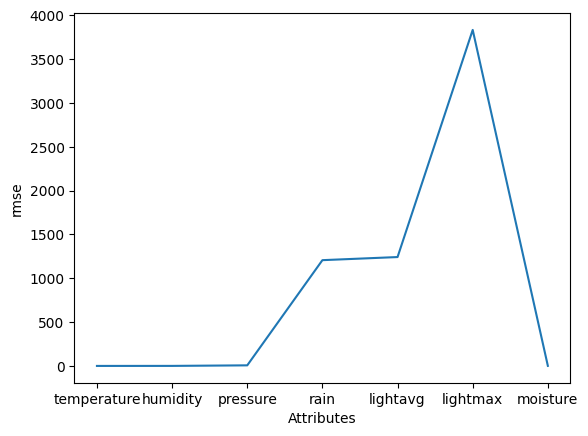

In [37]:
plt.plot(l,rmse)
plt.xlabel("Attributes")
plt.ylabel("rmse")
plt.show()